In [1]:
# Run if working locally
%load_ext autoreload
%autoreload 2
%load_ext nb_black

<IPython.core.display.Javascript object>

In [16]:
import sqlite3
from sqlite3 import Error
import pickle
import os, sys
import config
import matplotlib.pyplot as plt

config.root_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, config.root_path)

from db.dbv2 import Table, AugmentedTable, TrainTestTable

<IPython.core.display.Javascript object>

In [75]:
dataset_type = "product"
table = Table(dataset_type)
augmented_table = AugmentedTable(dataset_type)
train_test_table = TrainTestTable(dataset_type)

<IPython.core.display.Javascript object>

In [76]:
all_rows = table.get_all()

<IPython.core.display.Javascript object>

In [77]:
all_text = [x[1] for x in all_rows]

<IPython.core.display.Javascript object>

In [78]:
# helpers
def get_num_words(text):
    return len(text.split())

<IPython.core.display.Javascript object>

## Word Frequencies

In [79]:
word_count_text = [get_num_words(text) for text in all_text]

# construct a dictionary of frequencies
word_count_dict = {}
for num in sorted(word_count_text):
    if num in word_count_dict:
        word_count_dict[num] += 1
    else:
        word_count_dict[num] = 0

<IPython.core.display.Javascript object>

In [80]:
(num_words, num_words_freq) = zip(*word_count_dict.items())

<IPython.core.display.Javascript object>

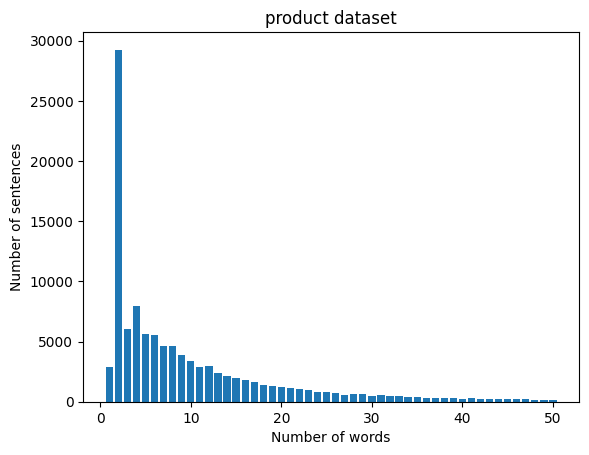

<IPython.core.display.Javascript object>

In [81]:
frequencies_to_show = 50
plt.bar(num_words[:frequencies_to_show], num_words_freq[:frequencies_to_show])
# plt.legend()

# The following commands add labels to our figure.
plt.xlabel("Number of words")
plt.ylabel("Number of sentences")
plt.title(f"{dataset_type} dataset")

plt.show()

## Sample of sentences

In [82]:
word_count_text = [(get_num_words(text), idx) for idx, text in enumerate(all_text)]

sorted_word_count_text = sorted(word_count_text, key=lambda x: x[0])

num_samples_to_show = 50
num_words_of_interest = 20

sentences = []
found = 0
for num_words, idx in sorted_word_count_text:
    if num_words == num_words_of_interest:
        sentences.append(all_text[idx])
        found += 1
    if found == num_samples_to_show or num_words > num_words_of_interest:
        break

<IPython.core.display.Javascript object>

In [83]:
sentences

['i think the microphone is on on the top , uh on the middle , the under the flip .',
 "i mean it does n't have to be on the flip , it can be on the side somewhere .",
 'i think the microphone is on on the top , uh on the middle , the under the flip .',
 "i mean it does n't have to be on the flip , it can be on the side somewhere .",
 "uh this is just production cost , it is not uh advertising cost , it 's not transportation cost uh",
 'yeah . you can do a shipping centre somewhere , or strategically place shipping centres to minimise distance costs .',
 'whereas on the web , if you have a bunch of pictures , it can sort of trigger ideas and',
 'i think the microphone is on on the top , uh on the middle , the under the flip .',
 "i mean it does n't have to be on the flip , it can be on the side somewhere .",
 "uh this is just production cost , it is not uh advertising cost , it 's not transportation cost uh",
 'yeah . you can do a shipping centre somewhere , or strategically place ship

<IPython.core.display.Javascript object>

## LINE BREAK

In [6]:
print("Number of sentences:", len(all_text))
print(
    "Number of sentences with no text:",
    len(list(filter(lambda text: len(text) == 0, all_text))),
)
print("Sentences with no text", list(filter(lambda text: len(text) == 0, all_text)))
print(
    "Number of sentences with 1 word:",
    len(list(filter(lambda text: num_words(text) == 1, all_text))),
)
print(
    "Number of sentences with 1 word:",
    list(filter(lambda text: num_words(text) == 1, all_text)),
)

Number of sentences: 16444
Number of sentences with no text: 0
Sentences with no text []
Number of sentences with 1 word: 5
Number of sentences with 1 word: ["we've—", "we've—", "we've—", "we've—", "we've—"]


<IPython.core.display.Javascript object>